Logistics Regression

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'heart-disease-prediction-using-logistic-regression' dataset.
Path to dataset files: /kaggle/input/heart-disease-prediction-using-logistic-regression
['framingham.csv']


In [11]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

df = df_imputed.copy()

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 529.9 KB


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


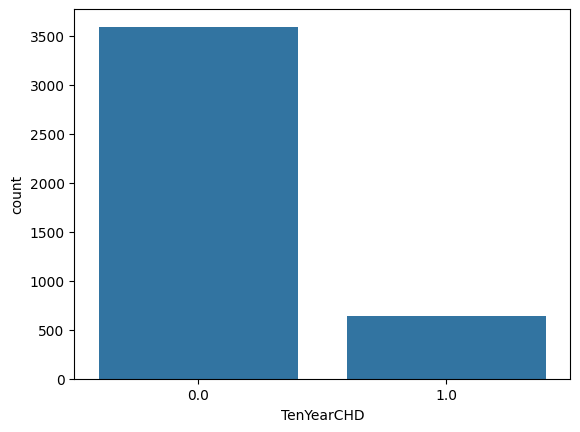

In [15]:
sns.countplot(x=df["TenYearCHD"])
plt.show()

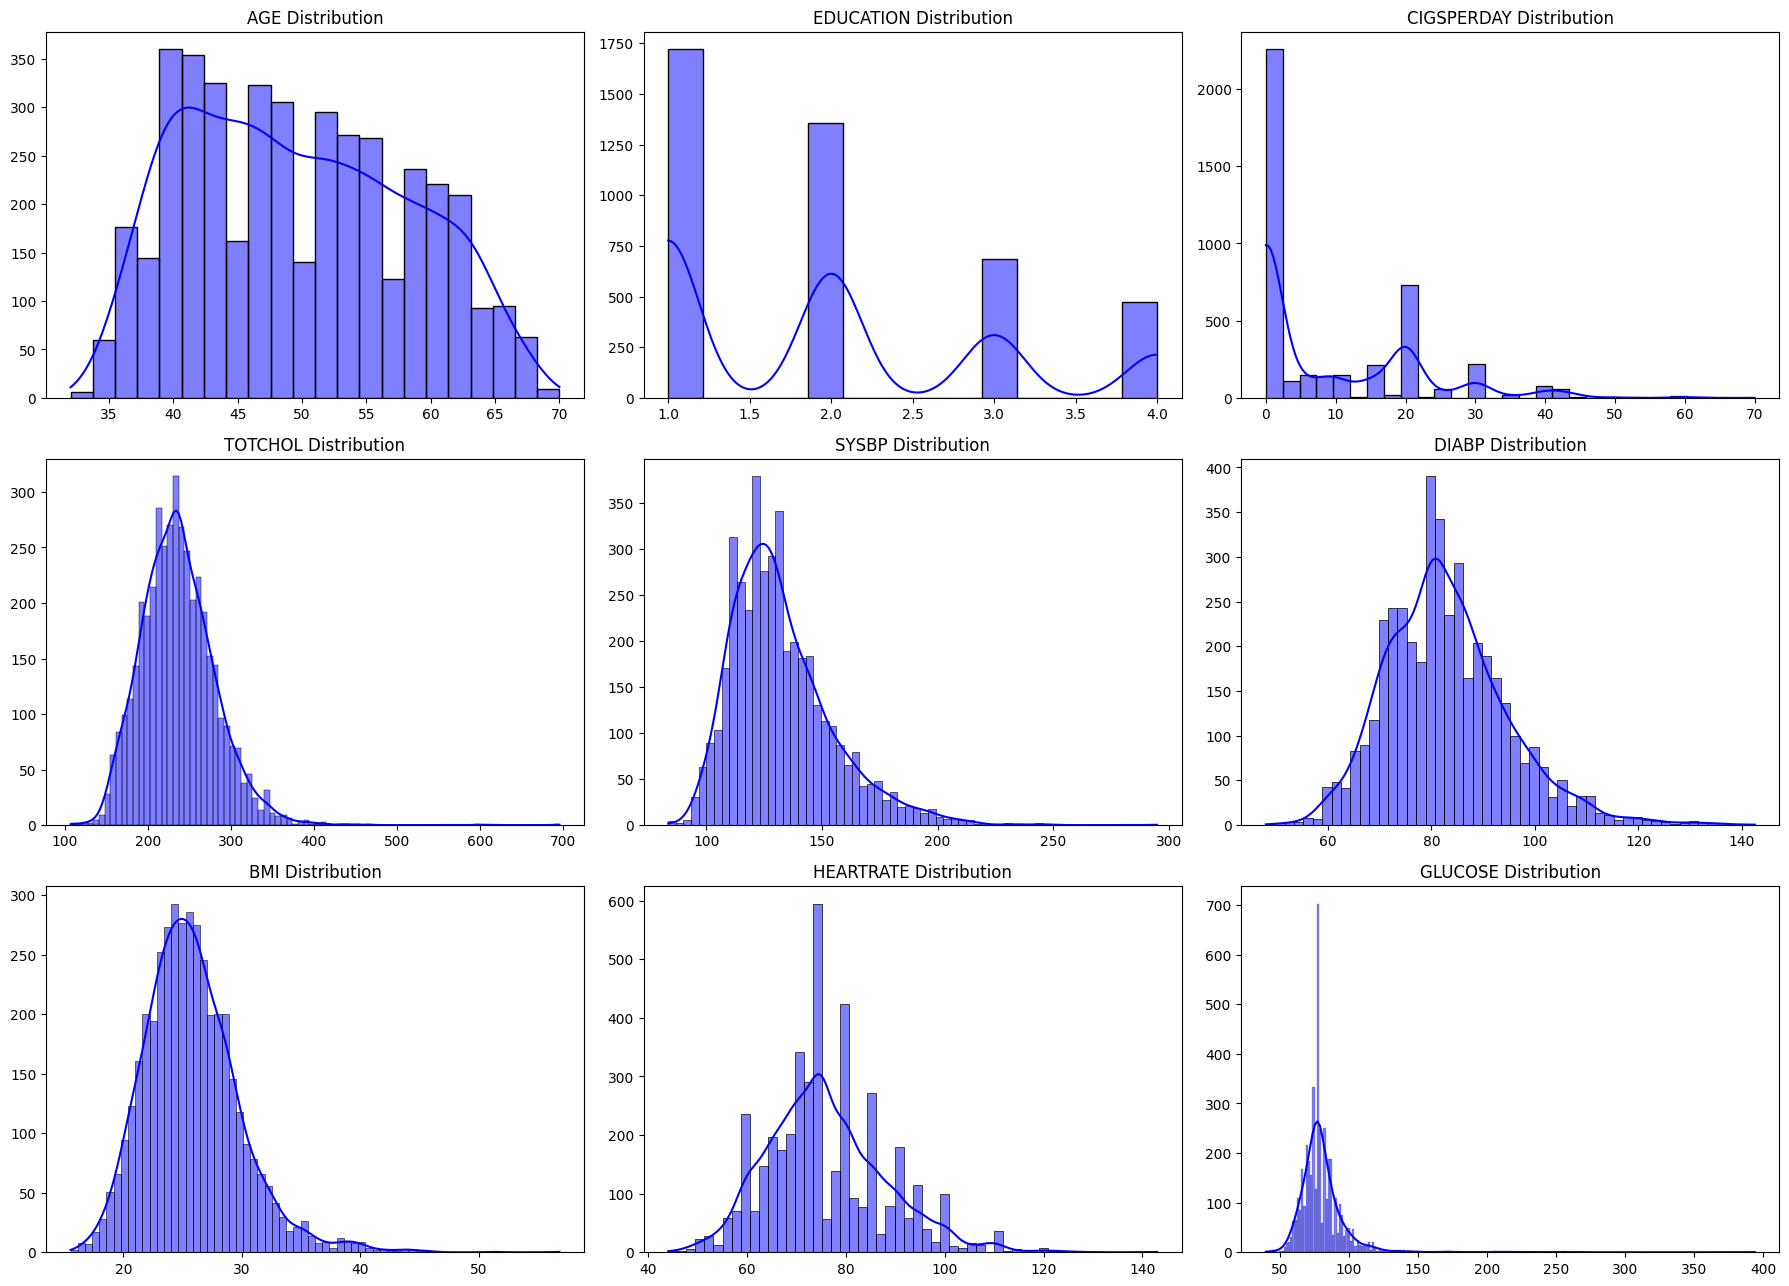

In [16]:
continuous_cols = ["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

plt.figure(figsize=(18,17))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],color="b",kde=True)
    plt.title(col.upper() + " Distribution")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()

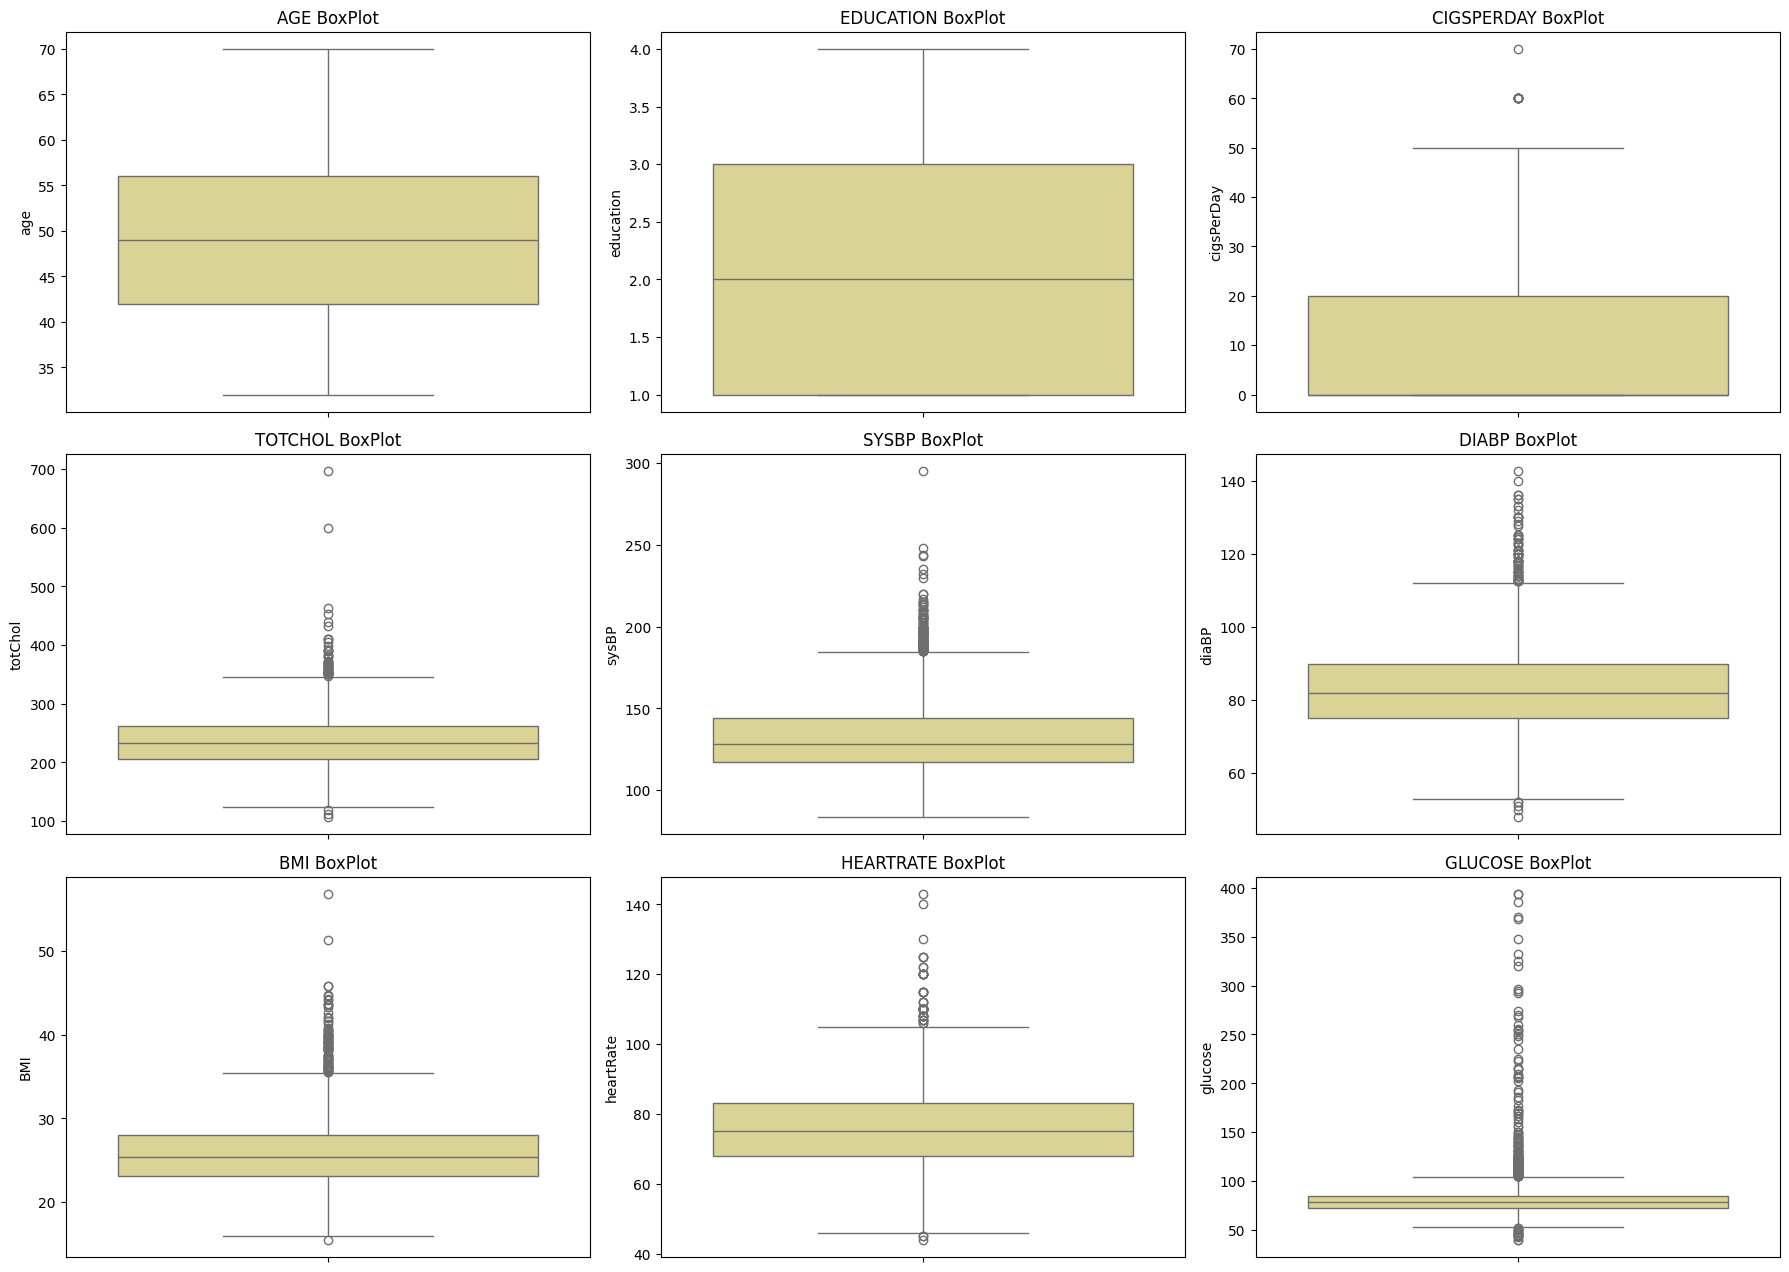

In [17]:
plt.figure(figsize=(18,17))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[col],color="#E4DE8B")
    plt.title(col.upper() + " BoxPlot")

plt.tight_layout()

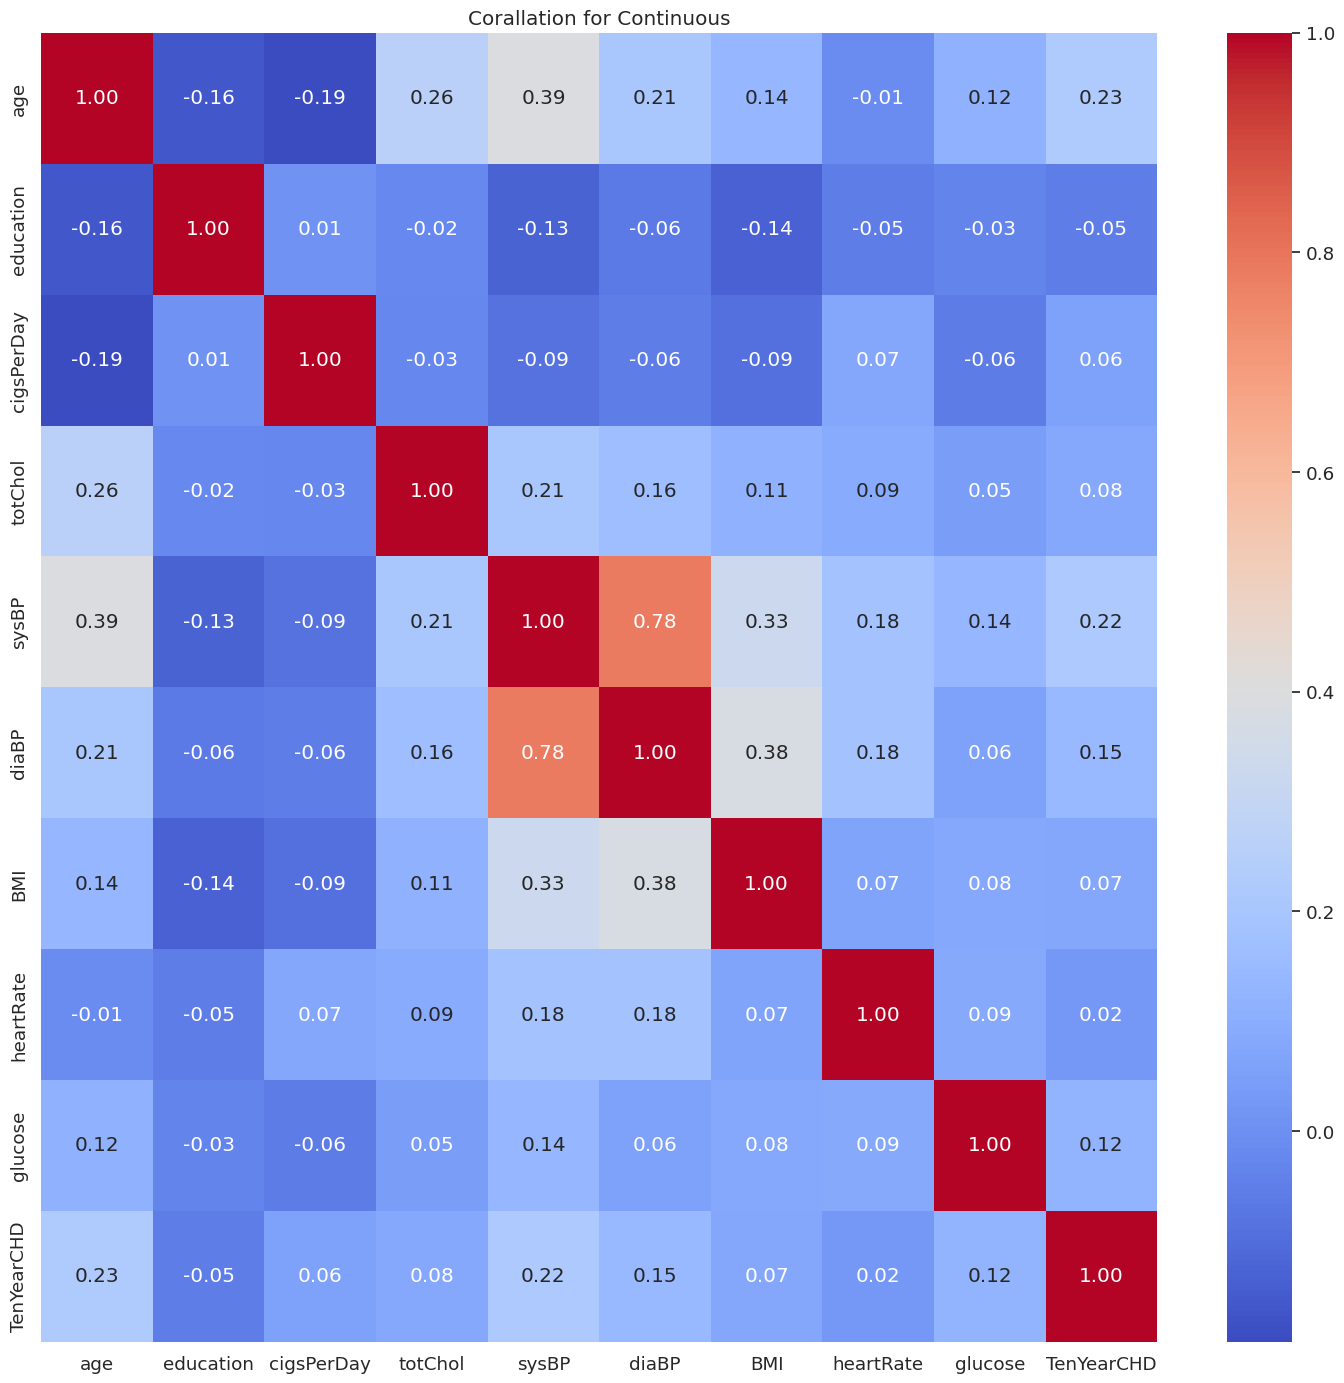

In [28]:
sns.set(style="whitegrid",
        font_scale=1.2)
plt.figure(figsize=(18,17))
sns.heatmap(df[continuous_cols + ["TenYearCHD"]].corr(),
            annot=True,
            cmap="coolwarm",
            fmt='.2f')
plt.title("Corallation for Continuous")
plt.show()

In [29]:
X = df.drop("TenYearCHD",axis=1)
y = df["TenYearCHD"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ["age",
              "education",
              "cigsPerDay",
              "totChol",
              "sysBP",
              "diaBP",
              "BMI",
              "heartRate",
              "glucose"]

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [31]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"akurasi: {accuracy:.3f}")
print(f"f1 score: {f1:.3f}")
print(f"precision: {precision:.3f}")
print(f"recall: {recall:.3f}")

akurasi: 0.849
f1 score: 0.111
precision: 0.561
recall: 0.062


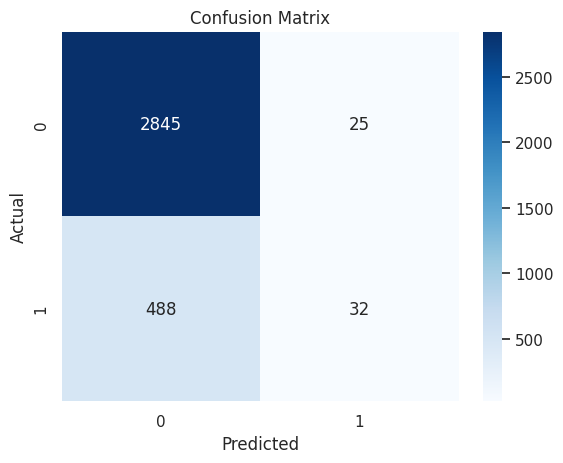

In [32]:
cm = confusion_matrix(y_test, y_pred)

sns.set(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92      2870
         1.0       0.56      0.06      0.11       520

    accuracy                           0.85      3390
   macro avg       0.71      0.53      0.51      3390
weighted avg       0.81      0.85      0.79      3390

